In [17]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_io as tfio

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [18]:
def load_audio(file_path):
  audio = tfio.audio.AudioIOTensor(file_path)
  return tf.squeeze(audio.to_tensor(), axis=-1), audio.rate.numpy()

def get_label(file_path):
  parts = re.sub('.+\_|[0-9]+.wav', '', file_path)
  return parts

In [19]:
DATA_DIR = "./data/SAVEE"

filenames = [(f'{DATA_DIR}/{p}', p) for p in os.listdir(DATA_DIR)]
df = pd.DataFrame([(f, *load_audio(filename), get_label(filename)) for (filename, f) in filenames], columns=['file', 'audio', 'rate', 'label']).set_index('file')

df.head()

,audio,rate,label
file,,,
JK_a13.wav,"(tf.Tensor(273, shape=(), dtype=int16), tf.Ten...",44100,a
JE_n14.wav,"(tf.Tensor(1303, shape=(), dtype=int16), tf.Te...",44100,n
DC_n16.wav,"(tf.Tensor(1360, shape=(), dtype=int16), tf.Te...",44100,n
KL_n30.wav,"(tf.Tensor(48, shape=(), dtype=int16), tf.Tens...",44100,n
DC_d12.wav,"(tf.Tensor(1308, shape=(), dtype=int16), tf.Te...",44100,d


In [4]:
train_files = df.iloc[:300]
val_files = df.iloc[300: 300 + 100]
test_files = df.iloc[-80:]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))
test_files.head()

Training set size 300
Validation set size 100
Test set size 80


,audio,rate,label
file,,,
KL_a06.wav,"(tf.Tensor(161, shape=(), dtype=int16), tf.Ten...",44100,a
JK_h11.wav,"(tf.Tensor(1645, shape=(), dtype=int16), tf.Te...",44100,h
JK_f07.wav,"(tf.Tensor(1284, shape=(), dtype=int16), tf.Te...",44100,f
JE_n04.wav,"(tf.Tensor(1300, shape=(), dtype=int16), tf.Te...",44100,n
JK_d10.wav,"(tf.Tensor(1653, shape=(), dtype=int16), tf.Te...",44100,d


In [32]:
for x in df.iloc[:1].iterrows():
  print(x)

('JK_a13.wav',
 audio    (tf.Tensor(273, shape=(), dtype=int16), tf.Ten...
 rate                                                 44100
 label                                                    a
 Name: JK_a13.wav, dtype: object)

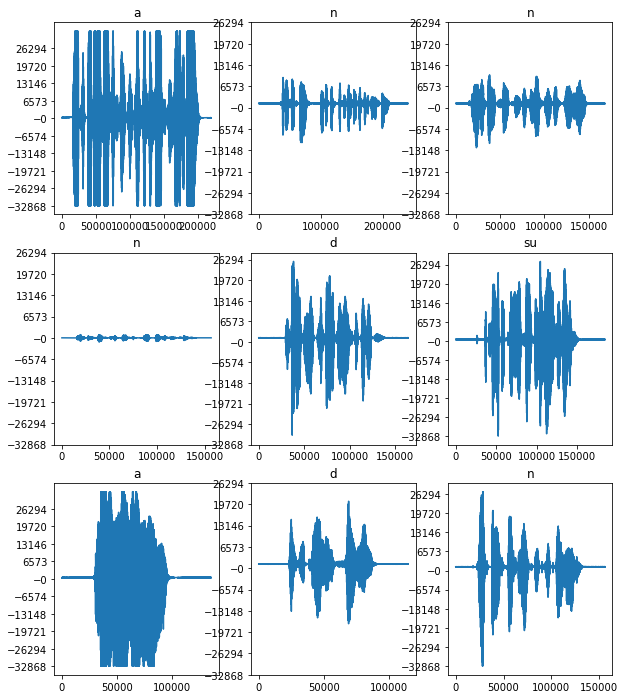

In [61]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

to_plot = df.iloc[:n]
max, min = to_plot['audio'].map(lambda x: x.numpy().max()).max(), to_plot['audio'].map(lambda x: x.numpy().min()).min()
ticks = np.arange(min - 100, max + 100, (max + 100 - (min - 100)) / 10)

for i, (_, row) in enumerate(to_plot.iterrows()):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(row['audio'].numpy())
  ax.set_yticks(ticks)
  label = row['label']
  ax.set_title(label)

plt.show()